In [1]:
import numpy as np
import os 
import cv2
import random
import sys 
import csv
import pandas as pd
import bz2
from bz2 import BZ2File
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from glob import glob
import fnmatch

from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import shutil

In [2]:
import seaborn as sns

iter = 3

palette = list(reversed(sns.color_palette("tab10", iter).as_hex()))
print(palette)

['#2ca02c', '#ff7f0e', '#1f77b4']


In [7]:
# input_folder = f'/shared/ssd_16T/yl535/project/python/datasets/harvard/dr_6948_v1'
# input_folder = f'/data/home/luoy/project/python/datasets/harvard/glaucoma_9220'
# input_folder = f'/data/home/luoy/project/python/datasets/havo_crosssectional_new_export/crosssectional_fairness_2100vs900_v1'
# input_folder = f'/data/home/luoy/project/python/datasets/harvard/Harvard-GF'
input_folder = f'/data/home/luoy/project/python/datasets/harvard/glaucoma_lancet_journal_9648_v0'

fundus_files = []
data_files = []

for root, dirnames, filenames in os.walk(input_folder):
    if len(dirnames) > 0:
        for x in dirnames:
            for f in os.listdir(os.path.join(input_folder, x)):
                if f.endswith('.npz'):
                    data_files.append(os.path.join(x,f))
    #                 img_id = f[f.find('_'):f.find('.')]
            #         fundus_files.append(f'{"fundus"}{img_id}.jpg')
    else:
        for f in os.listdir(input_folder):
            if f.endswith('.npz'):
                data_files.append(f)

In [9]:
labels = []
races = []
genders = []
ethnicities = []
ages = []

for x in data_files:
    raw_data = np.load(os.path.join(input_folder, x), allow_pickle=True)
#     labels.append(raw_data['dr_class'])
    labels.append(raw_data['glaucoma'])
    races.append(raw_data['race'])
    genders.append(raw_data['male'])
    ethnicities.append(raw_data['hispanic'])
#     ages.append(raw_data['age'])

In [10]:
_, label_occur = np.unique(labels, return_counts=True)
print(label_occur)
label_occur = label_occur / label_occur.sum()
_, race_occur = np.unique(races, return_counts=True)
print(race_occur)
race_occur = race_occur / race_occur.sum()
_, gender_occur = np.unique(genders, return_counts=True)
print(gender_occur)
gender_occur = gender_occur / gender_occur.sum()
_, ethnicities_occur = np.unique(ethnicities, return_counts=True)
print(ethnicities_occur)
ethnicities_occur = ethnicities_occur / ethnicities_occur.sum()
print(f'Non-Glaucoma: {label_occur[0]:.4f}, Glaucoma: {label_occur[1]:.4f}')
print(f'Asian: {race_occur[0]:.4f}, Black: {race_occur[1]:.4f}, White: {race_occur[2]:.4f}')
print(f'Female: {gender_occur[0]:.4f}, Male: {gender_occur[1]:.4f}')
print(f'Non-Hispanic: {ethnicities_occur[0]:.4f}, Hispanic: {ethnicities_occur[1]:.4f}')

[7645 7215]
[ 1275  2180 11405]
[8459 6401]
[14284   576]
Non-Glaucoma: 0.5145, Glaucoma: 0.4855
Asian: 0.0858, Black: 0.1467, White: 0.7675
Female: 0.5692, Male: 0.4308
Non-Hispanic: 0.9612, Hispanic: 0.0388


[0 1] [7645 7215]


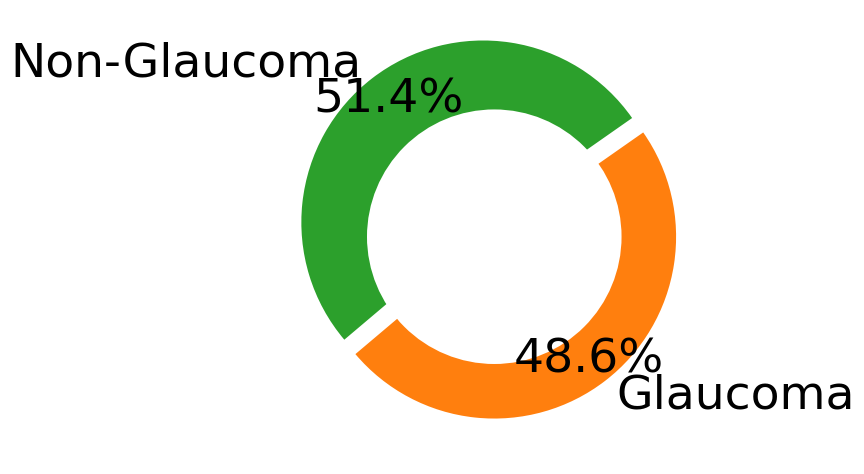

In [11]:
output_file = '/data/home/luoy/project/python/fairness_learning/fairness_learning/data4paper_lancet/gf_labels_pie.pdf'


label_set, occu = np.unique(labels, return_counts=True)
print(label_set, occu)

# Pie chart
mylabels = ['Non-Glaucoma', 'Glaucoma']
# sizes = [15, 30, 45, 10]
#colors
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors = ['#ff9999','#66b3ff','#99ff99']
#explsion
# explode = (0.05,0.05,0.05,0.05)
explode = (0.1, 0.0, 0.1)

colors = colors[:len(mylabels)]
explode = explode[:len(mylabels)]

# fig1, ax1 = plt.subplots()
fig = plt.figure(figsize=(8, 8))
 
# plt.pie(occu, colors = colors, labels=mylabels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
# #draw circle
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
# # Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
# plt.tight_layout()
# plt.show()


# ax1.pie(occu, explode=explode, labels=mylabels, colors=colors, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# # Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')
# plt.tight_layout()
# plt.show()

plt.pie(occu, colors = palette[:len(colors)], labels=mylabels, autopct='%1.1f%%', startangle=35, \
        pctdistance=0.85, explode = explode, textprops={'fontsize': 34})
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
plt.tight_layout()
plt.show()
fig.savefig(output_file, format='pdf', bbox_inches='tight')
# plt.savefig(output_file, bbox_inches='tight', dpi=300)

[0 1 2] [ 1275  2180 11405]


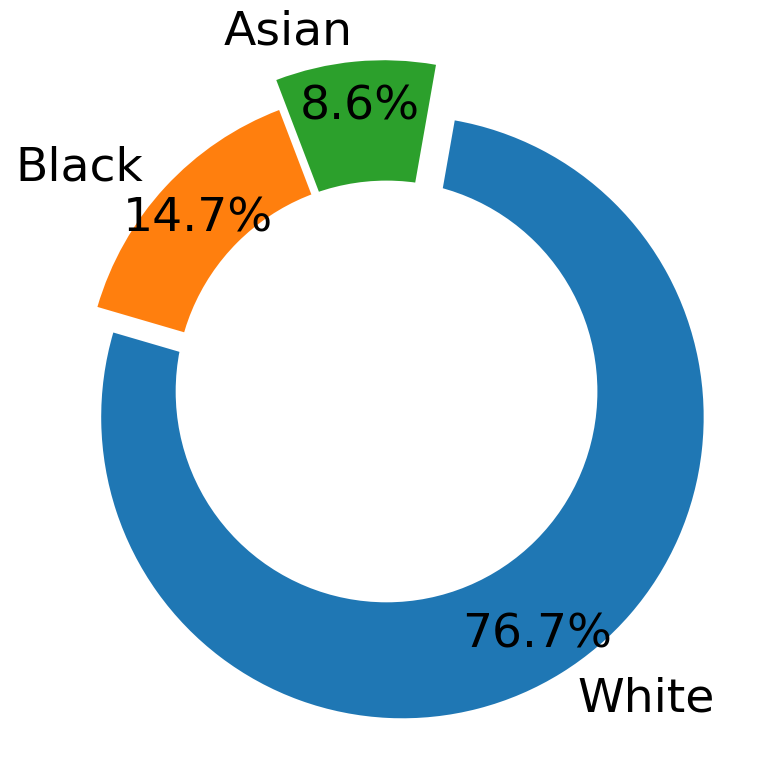

In [12]:
output_file = '/data/home/luoy/project/python/fairness_learning/fairness_learning/data4paper_lancet/gf_race_pie.pdf'

label_set, occu = np.unique(races, return_counts=True)
print(label_set, occu)

# Pie chart
mylabels = ['Asian', 'Black', 'White']
# sizes = [15, 30, 45, 10]
#colors
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors = ['#ff9999','#66b3ff','#99ff99']
#explsion
# explode = (0.05,0.05,0.05,0.05)
explode = (0.1,0.0,0.1)

colors = colors[:len(mylabels)]
explode = explode[:len(mylabels)]

fig = plt.figure(figsize=(8, 8))
# fig1, ax1 = plt.subplots()

plt.pie(occu, colors = palette[:len(colors)], labels=mylabels, autopct='%1.1f%%', \
        startangle=80, pctdistance=0.85, explode = explode, textprops={'fontsize': 34})
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
plt.tight_layout()
plt.show()
fig.savefig(output_file, format='pdf', bbox_inches='tight')

[0 1] [8459 6401]


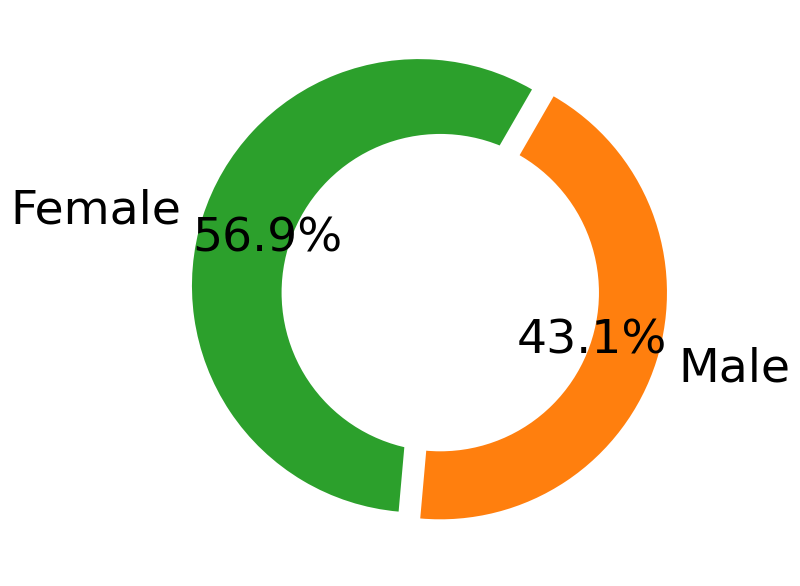

In [13]:
output_file = '/data/home/luoy/project/python/fairness_learning/fairness_learning/data4paper_lancet/gf_gender_pie.pdf'

label_set, occu = np.unique(genders, return_counts=True)
print(label_set, occu)

# Pie chart
mylabels = ['Female', 'Male']
# sizes = [15, 30, 45, 10]
#colors
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors = ['#ff9999','#66b3ff']
#explsion
# explode = (0.05,0.05,0.05,0.05)
explode = (0.1,0.0)

colors = colors[:len(mylabels)]
explode = explode[:len(mylabels)]

fig = plt.figure(figsize=(8, 8))
# fig1, ax1 = plt.subplots()

plt.pie(occu, colors = palette[:len(colors)], labels=mylabels, autopct='%1.1f%%', \
        startangle=60, pctdistance=0.7, explode = explode, textprops={'fontsize': 34})
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
plt.tight_layout()
plt.show()
fig.savefig(output_file, format='pdf', bbox_inches='tight')

[0 1] [14284   576]


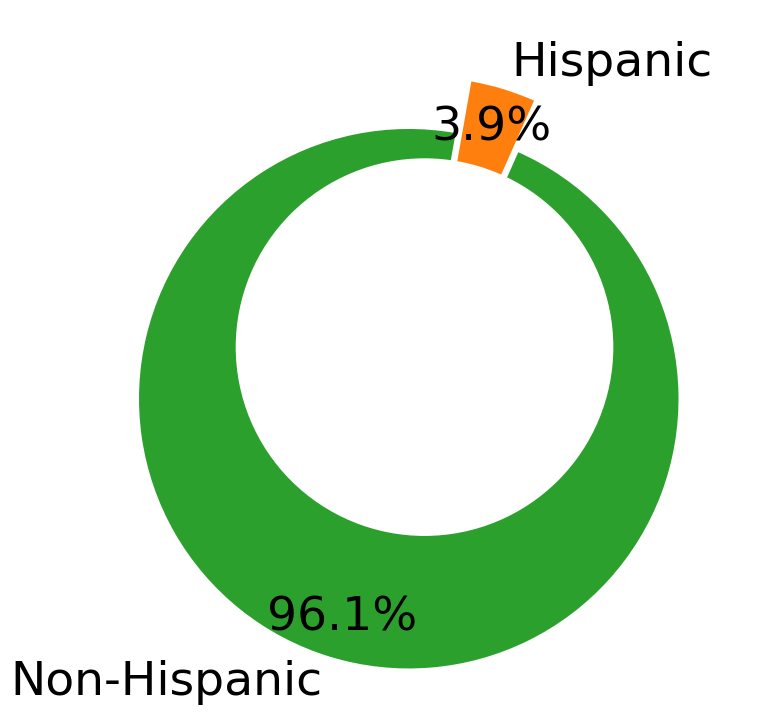

In [21]:
output_file = '/data/home/luoy/project/python/fairness_learning/fairness_learning/data4paper_lancet/gf_ethnicity_pie.pdf'

label_set, occu = np.unique(ethnicities, return_counts=True)
print(label_set, occu)

# Pie chart
# mylabels = ['Unknown', 'Non-Hispanic', 'Hispanic']
mylabels = ['Non-Hispanic', 'Hispanic']
# sizes = [15, 30, 45, 10]
#colors
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# colors = ['#99ff99', '#ff9999', '#66b3ff']
colors = ['#ff9999','#66b3ff']
#explsion
# explode = (0.05,0.05,0.05,0.05)
explode = (0.2,0.0,0.1)

colors = colors[:len(mylabels)]
explode = explode[:len(mylabels)]

fig = plt.figure(figsize=(8, 8))
# fig1, ax1 = plt.subplots()

plt.pie(occu, colors = palette[:len(colors)], labels=mylabels, autopct='%1.1f%%', \
        startangle=80, pctdistance=0.85, explode = explode, textprops={'fontsize': 34})
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
plt.tight_layout()
plt.show()
fig.savefig(output_file, format='pdf', bbox_inches='tight')

59.13089892071398 61.412328767123284


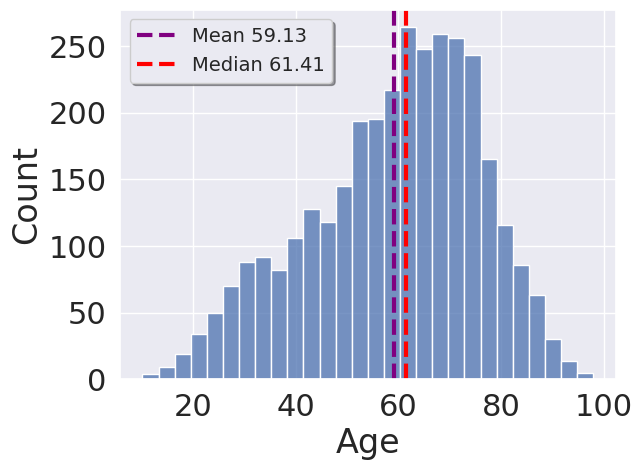

In [68]:
output_file = '/data/home/luoy/project/python/fairness_learning/fairness_learning/data4paper_lancet/gf_age_hist.pdf'

sns.set(style="darkgrid")
# df = sns.load_dataset("iris")
sns.set(font_scale=2)

mean = np.mean(ages)
median = np.median(ages)
print(mean, median)

fig = plt.figure()

tbl_ages = pd.Series(np.array(ages), name = "Age")
ax = sns.histplot(data=tbl_ages)

ax.axvline(x = mean,
           linestyle = 'dashed', color = 'purple', linewidth = 3,
           ymin = 0.0,
           ymax = 300, 
           label=f'Mean {mean:.2f}')
ax.axvline(x = median,
           linestyle = 'dashed', color = 'red', linewidth = 3,
           ymin = 0.0,
           ymax = 300,
           label=f'Median {median:.2f}')
legend = ax.legend(loc=0, shadow=True, fontsize=14) # fontsize='x-large'

plt.show()
fig.savefig(output_file, format='pdf', bbox_inches='tight')

In [28]:
split_file = '/data/home/luoy/project/python/datasets/harvard/fairness_for_year2223/split10.csv'
split_df = pd.read_csv(split_file, sep=',')

train_files = []
val_files = []
test_files = []
for i, row in split_df.iterrows():
    if row['purpose'] == 'train':
        train_files.append(row['fname'])
    elif row['purpose'] == 'val':
        val_files.append(row['fname'])
    elif row['purpose'] == 'test':
        test_files.append(row['fname'])

['data_000000_1001310_year=2022_gender=0_race=2_ethnicity=0.npz', 'data_000002_1001429_year=2022_gender=1_race=0_ethnicity=0.npz', 'data_000010_1003114_year=2022_gender=1_race=2_ethnicity=0.npz', 'data_000012_1003114_year=2022_gender=1_race=2_ethnicity=0.npz', 'data_000014_1003755_year=2022_gender=0_race=1_ethnicity=0.npz', 'data_000015_1004277_year=2022_gender=0_race=2_ethnicity=0.npz', 'data_000019_1004475_year=2022_gender=1_race=0_ethnicity=0.npz', 'data_000021_1004475_year=2022_gender=1_race=0_ethnicity=0.npz', 'data_000022_1004475_year=2022_gender=1_race=0_ethnicity=0.npz', 'data_000030_1005325_year=2022_gender=1_race=2_ethnicity=0.npz', 'data_000031_1005394_year=2022_gender=0_race=2_ethnicity=0.npz', 'data_000032_1005394_year=2022_gender=0_race=2_ethnicity=0.npz', 'data_000034_1005558_year=2022_gender=1_race=2_ethnicity=0.npz', 'data_000036_1008246_year=2022_gender=1_race=2_ethnicity=0.npz', 'data_000045_1008880_year=2022_gender=0_race=2_ethnicity=1.npz', 'data_000046_1008880_yea

True True
(200, 1024)
0 187 <class 'numpy.ndarray'> uint8


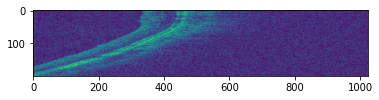

In [46]:
# input_file = '/shared/hdds_20T/cirrus_from_dicom/scans/1.2.276.0.75.2.2.42.215507184424210.20210903114857923.49292361/bscan1.jp2'
input_file = '/shared/hdds_20T/cirrus_from_dicom/scans/1.2.276.0.75.2.2.42.114374076624747.20170816133700164.5796757150/bscan1.jp2'
bscan = cv2.imread(input_file)
print((bscan[:,:,0]==bscan[:,:,1]).all(), (bscan[:,:,2]==bscan[:,:,1]).all())
bscan = bscan[:,:,0]
print(bscan.shape)
print(np.min(bscan), np.max(bscan), type(bscan), bscan.dtype)
plt.imshow(bscan)

In [31]:
for i in range(10):
    print(random.randint(1, 1000000))

855751
991806
415895
180888
310700
12469
732798
187471
906896
97194


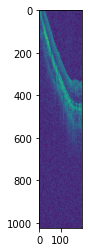

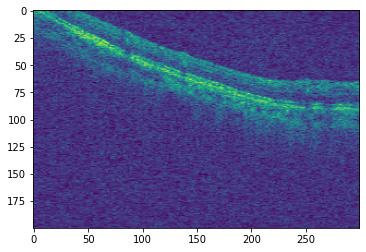

In [47]:
bscan = cv2.rotate(bscan, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(bscan)
plt.show()
bscan = cv2.resize(bscan, (300,200))
plt.imshow(bscan)

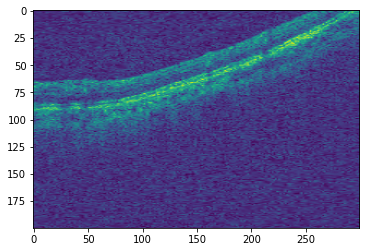

In [48]:
bscan = np.flip(bscan, axis=1)
plt.imshow(bscan)

<class 'numpy.ndarray'> 60000 (60000, 1) 2
----below is a sample in the old export----


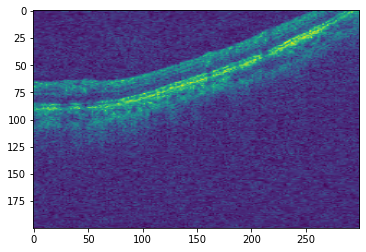

----below is a sample in the new export----


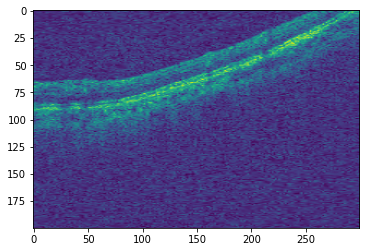

In [49]:
# old export
input_file = '/shared/hdds_20T/yl535/elzelab/cirrus_viewer_export/scans/4000-8168_170816133700/b1.csv.bz2'
bscan_old = pd.read_csv(input_file, header=None)
bscan_old = bscan_old.to_numpy()
print(type(bscan_old), bscan_old.size, bscan_old.shape, bscan_old.ndim)
bscan_old = bscan_old.reshape((200,300))
print('----below is a sample in the old export----')
plt.imshow(bscan_old)
plt.show()
print('----below is a sample in the new export----')
plt.imshow(bscan)

<class 'numpy.ndarray'> 60000 (60000, 1) 2


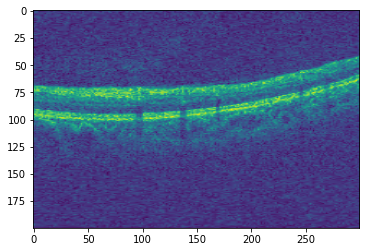

In [33]:
# old export
input_file = '/shared/hdds_20T/yl535/elzelab/cirrus_viewer_export/scans/4000-8168_170428090234/b1.csv.bz2'
bscan = pd.read_csv(input_file, header=None)
bscan = bscan.to_numpy()
print(type(bscan), bscan.size, bscan.shape, bscan.ndim)
bscan = bscan.reshape((200,300))
plt.imshow(bscan)

(512, 1024, 3)
(1024, 512)


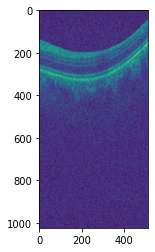

In [26]:
input_file = '/shared/external_hdds/external20TB_1/cirrus_from_dicom/scans/1.2.276.0.75.2.2.42.114374075547479.20191021140719035.3252403720/bscan1.jp2'
# bscan = pd.read_csv(input_file, header=None)
# bscan = bscan.to_numpy()
# print(type(bscan), bscan.size, bscan.shape, bscan.ndim)
# bscan = bscan.reshape((200,300))

bscan = cv2.imread(input_file)
print(bscan.shape)
# bscan = bscan[:,:,0]
bscan = np.mean(bscan, axis=2)
bscan = cv2.rotate(bscan, cv2.ROTATE_90_CLOCKWISE)
bscan = cv2.resize(bscan, (200,200))
# bscan = cv2.resize(cv2.rotate(bscan, cv2.ROTATE_90_CLOCKWISE), (300,200))
bscan = np.flip(bscan, axis=1)
print(bscan.shape)

plt.imshow(bscan)

<class 'numpy.ndarray'> 65536 (65536, 1) 2
<class 'numpy.ndarray'> 65536 (65536, 1) 2


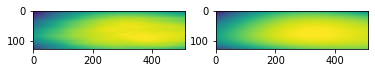

In [25]:
scan_folder = '/shared/external_hdds/external20TB_1/cirrus_from_dicom/scans/1.2.276.0.75.2.2.42.114374075547479.20191021140719035.3252403720'
csv_file = os.path.join(scan_folder, 'segmentation_rpe.csv')

plt.subplot(1, 2, 1)

bscan = pd.read_csv(csv_file, header=None)
bscan = bscan.to_numpy()
print(type(bscan), bscan.size, bscan.shape, bscan.ndim)
bscan = bscan.reshape((128, 512))

plt.imshow(bscan)

plt.subplot(1, 2, 2)

csv_file = os.path.join(scan_folder, 'segmentation_rpefit.csv')

bscan = pd.read_csv(csv_file, header=None)
bscan = bscan.to_numpy()
print(type(bscan), bscan.size, bscan.shape, bscan.ndim)
bscan = bscan.reshape((128, 512))

plt.imshow(bscan)

(512, 1024, 3)
(1024, 512)
<class 'numpy.ndarray'> 65536 (65536, 1) 2
<class 'numpy.ndarray'> 65536 (65536, 1) 2


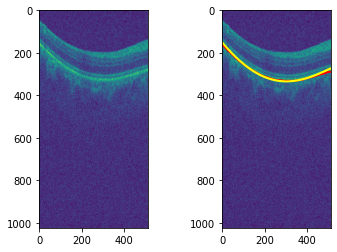

In [33]:
input_file = '/shared/external_hdds/external20TB_1/cirrus_from_dicom/scans/1.2.276.0.75.2.2.42.114374075547479.20191021140719035.3252403720/bscan1.jp2'
csv_file = os.path.join(scan_folder, 'segmentation_rpe.csv')
csv_rpefit_file = os.path.join(scan_folder, 'segmentation_rpefit.csv')

target_size = (200, 200)

plt.subplot(1, 2, 1)

bscan = cv2.imread(input_file)
print(bscan.shape)
# bscan = bscan[:,:,0]
bscan = np.mean(bscan, axis=2)
bscan = cv2.rotate(bscan, cv2.ROTATE_90_CLOCKWISE)
bscan = np.flip(bscan, axis=1)
# bscan = cv2.resize(bscan, target_size)
print(bscan.shape)

plt.imshow(bscan)

plt.subplot(1, 2, 2)

plt.imshow(bscan)

boundary_rpe = pd.read_csv(csv_file, header=None)
boundary_rpe = boundary_rpe.to_numpy()
print(type(boundary_rpe), boundary_rpe.size, boundary_rpe.shape, boundary_rpe.ndim)
boundary_rpe = boundary_rpe.reshape((128, 512))

segment_line = boundary_rpe[1,:]
x_indices = list(range(segment_line.shape[0]))
# print(segment_line.shape)
plt.plot(x_indices, segment_line, label='rpe', linewidth=2, color='red')

boundary_rpe = pd.read_csv(csv_rpefit_file, header=None)
boundary_rpe = boundary_rpe.to_numpy()
print(type(boundary_rpe), boundary_rpe.size, boundary_rpe.shape, boundary_rpe.ndim)
boundary_rpe = boundary_rpe.reshape((128, 512))

segment_line = boundary_rpe[1,:]
x_indices = list(range(segment_line.shape[0]))
# print(segment_line.shape)
plt.plot(x_indices, segment_line, label='rpefit', linewidth=2, color='yellow')



(512, 1024, 3)
(1024, 512)
<class 'numpy.ndarray'> 65536 (65536, 1) 2
<class 'numpy.ndarray'> 65536 (65536, 1) 2


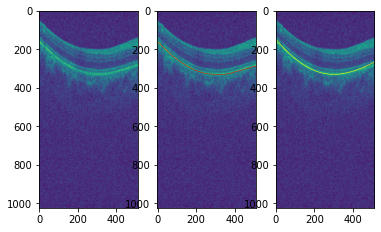

In [45]:
i = 0
input_file = f'/shared/external_hdds/external20TB_1/cirrus_from_dicom/scans/1.2.276.0.75.2.2.42.114374075547479.20191021140719035.3252403720/bscan{i+1}.jp2'
csv_file = os.path.join(scan_folder, 'segmentation_rpe.csv')
csv_rpefit_file = os.path.join(scan_folder, 'segmentation_rpefit.csv')

target_size = (200, 200)

# resized_x = np.linspace()
# np.interp(, x, y)

plt.subplot(1, 3, 1)

bscan = cv2.imread(input_file)
print(bscan.shape)
# bscan = bscan[:,:,0]
bscan = np.mean(bscan, axis=2)
bscan = cv2.rotate(bscan, cv2.ROTATE_90_CLOCKWISE)
bscan = np.flip(bscan, axis=1)
# bscan = cv2.resize(bscan, target_size)
print(bscan.shape)

plt.imshow(bscan)
# fig.savefig('test2png.png', dpi=100)

plt.subplot(1, 3, 2)

plt.imshow(bscan)

boundary_rpe = pd.read_csv(csv_file, header=None)
boundary_rpe = boundary_rpe.to_numpy()
print(type(boundary_rpe), boundary_rpe.size, boundary_rpe.shape, boundary_rpe.ndim)
boundary_rpe = boundary_rpe.reshape((128, 512))

segment_line = boundary_rpe[i,:]
x_indices = list(range(segment_line.shape[0]))
# print(segment_line.shape)
plt.plot(x_indices, segment_line, label='rpe', linewidth=.5, color='red')

plt.subplot(1, 3, 3)

plt.imshow(bscan)

boundary_rpe = pd.read_csv(csv_rpefit_file, header=None)
boundary_rpe = boundary_rpe.to_numpy()
print(type(boundary_rpe), boundary_rpe.size, boundary_rpe.shape, boundary_rpe.ndim)
boundary_rpe = boundary_rpe.reshape((128, 512))

segment_line = boundary_rpe[i,:]
x_indices = list(range(segment_line.shape[0]))
# print(segment_line.shape)
plt.plot(x_indices, segment_line, label='rpefit', linewidth=.5, color='yellow')




(512, 1024, 3)
(1024, 512)
<class 'numpy.ndarray'> 65536 (65536, 1) 2


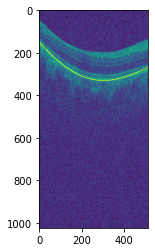

In [49]:
i = 0
input_file = f'/shared/external_hdds/external20TB_1/cirrus_from_dicom/scans/1.2.276.0.75.2.2.42.114374075547479.20191021140719035.3252403720/bscan{i+1}.jp2'
csv_file = os.path.join(scan_folder, 'segmentation_rpe.csv')
csv_rpefit_file = os.path.join(scan_folder, 'segmentation_rpefit.csv')

target_size = (200, 200)

# resized_x = np.linspace()
# np.interp(, x, y)

bscan = cv2.imread(input_file)
print(bscan.shape)
# bscan = bscan[:,:,0]
bscan = np.mean(bscan, axis=2)
bscan = cv2.rotate(bscan, cv2.ROTATE_90_CLOCKWISE)
bscan = np.flip(bscan, axis=1)
# bscan = cv2.resize(bscan, target_size)
print(bscan.shape)

plt.imshow(bscan)
plt.savefig('original.jpg', dpi=100)
# #------------------------------
# boundary_rpe = pd.read_csv(csv_file, header=None)
# boundary_rpe = boundary_rpe.to_numpy()
# print(type(boundary_rpe), boundary_rpe.size, boundary_rpe.shape, boundary_rpe.ndim)
# boundary_rpe = boundary_rpe.reshape((128, 512))

# segment_line = boundary_rpe[i,:]
# x_indices = list(range(segment_line.shape[0]))
# # print(segment_line.shape)
# plt.imshow(bscan)
# plt.plot(x_indices, segment_line, label='rpe', linewidth=.5, color='red')
# plt.savefig('original_w_rpe.jpg', dpi=100)
#------------------------------
boundary_rpe = pd.read_csv(csv_rpefit_file, header=None)
boundary_rpe = boundary_rpe.to_numpy()
print(type(boundary_rpe), boundary_rpe.size, boundary_rpe.shape, boundary_rpe.ndim)
boundary_rpe = boundary_rpe.reshape((128, 512))

segment_line = boundary_rpe[i,:]
x_indices = list(range(segment_line.shape[0]))
# print(segment_line.shape)
plt.imshow(bscan)
plt.plot(x_indices, segment_line, label='rpefit', linewidth=.5, color='yellow')
plt.savefig('original_w_rpefit.jpg', dpi=100)


(512, 664, 3)
0 104


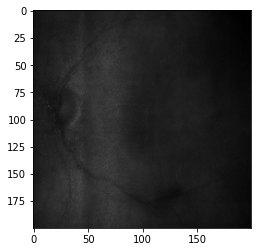

In [64]:
input_file = f'/shared/external_hdds/external20TB_1/cirrus_from_dicom/scans/1.2.276.0.75.2.2.42.215507184424654.20220106102251157.8740237920/slo.jp2'
# input_file = f'/shared/external_hdds/external20TB_1/cirrus_from_dicom/scans/1.2.276.0.75.2.2.42.114374075547479.20191021140719035.3252403720/octfundusimg.jp2'
slo_fundus = cv2.imread(input_file)
target_size = (200, 200)
print(slo_fundus.shape)
print(slo_fundus.min(), slo_fundus.max())
# slo_fundus = (slo_fundus - slo_fundus.min()) / (slo_fundus.max() - slo_fundus.min()) * 255
# bscan = bscan[:,:,0]
# bscan = np.mean(bscan, axis=2)
slo_fundus = cv2.rotate(slo_fundus, cv2.ROTATE_90_CLOCKWISE)
# bscan = np.flip(bscan, axis=1)
slo_fundus = cv2.resize(slo_fundus, target_size)

plt.imshow(slo_fundus)

(3,)
(512, 664, 3)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]] 67


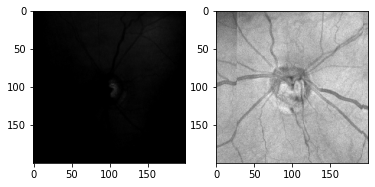

In [77]:
datadir = '1.2.276.0.75.2.2.42.215507184101704.20210610155429383.3968745570'
input_file =     f'/shared/external_hdds/external20TB_1/cirrus_from_dicom/scans/{datadir}/slo.jp2'
octfundus_file = f'/shared/external_hdds/external20TB_1/cirrus_from_dicom/scans/{datadir}/octfundusimg.jp2'

target_size = (200, 200)

plt.subplot(1, 2, 1)

slo_fundus = cv2.imread(input_file)
print(slo_fundus.shape)
print(slo_fundus.min(axis=0).min(axis=0), slo_fundus.max())
# slo_fundus = slo_fundus / slo_fundus.max() * 67
# slo_fundus = (slo_fundus - slo_fundus.min()) / (slo_fundus.max() - slo_fundus.min()) * 255
# bscan = bscan[:,:,0]
# bscan = np.mean(bscan, axis=2)
slo_fundus = cv2.rotate(slo_fundus, cv2.ROTATE_90_CLOCKWISE)
# bscan = np.flip(bscan, axis=1)
slo_fundus = cv2.resize(slo_fundus, target_size)

plt.imshow(slo_fundus)

plt.subplot(1, 2, 2)

oct_fundus = cv2.imread(octfundus_file)
oct_fundus = cv2.rotate(oct_fundus, cv2.ROTATE_90_CLOCKWISE)
oct_fundus = cv2.resize(oct_fundus, target_size)
plt.imshow(oct_fundus)